# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [27]:
data = pd.read_excel("../Data/LabeledText.xlsx")
data.head()

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive


# Exploratory data analysis

## Basic info

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File Name  4869 non-null   object
 1   Caption    4869 non-null   object
 2   LABEL      4869 non-null   object
dtypes: object(3)
memory usage: 114.2+ KB


## Caption Lengths

In [29]:
data['Caption Length'] = data['Caption'].apply(len)
data.head()

,File Name,Caption,LABEL,Caption Length
0,1.txt,How I feel today #legday #jelly #aching #gym,negative,45
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative,99
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive,117
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral,93
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive,42


## Label Distribution

In [30]:
data['LABEL'].value_counts()

LABEL
neutral     1771
positive    1646
negative    1452
Name: count, dtype: int64

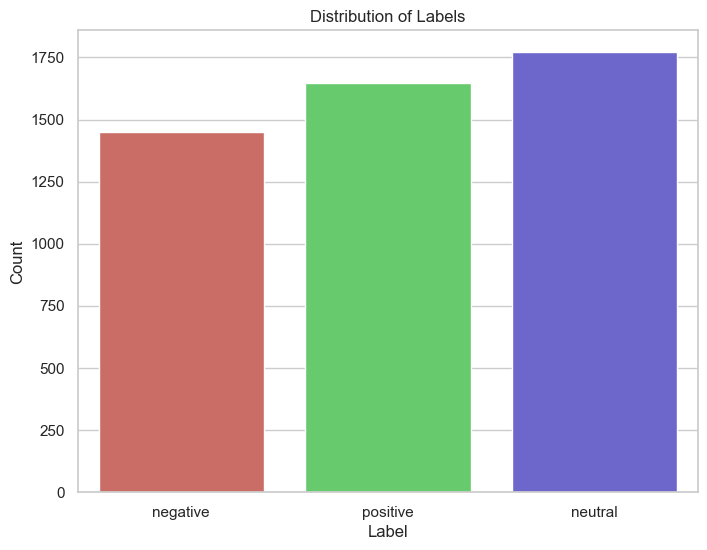

In [31]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x="LABEL", data=data, palette="hls")

plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels")

plt.show()

## Length of Captions

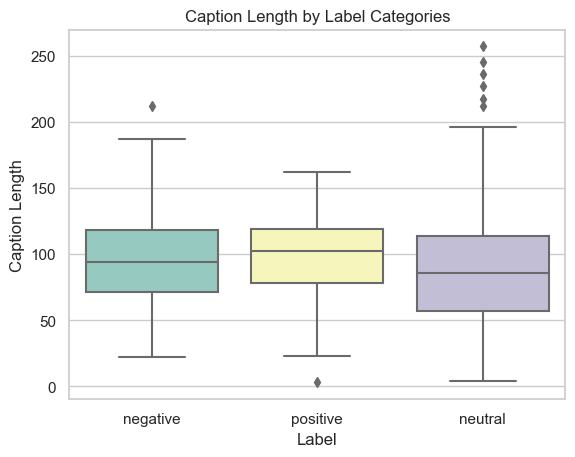

In [32]:
sns.boxplot(x="LABEL", y="Caption Length", data=data, palette="Set3")

plt.xlabel("Label")
plt.ylabel("Caption Length")
plt.title("Caption Length by Label Categories")

plt.show()

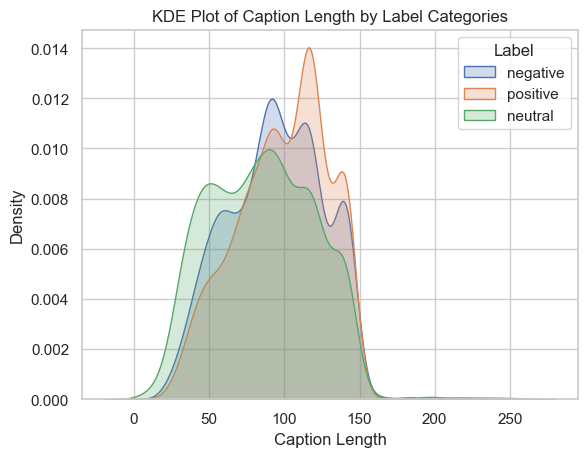

In [33]:
sns.set(style="whitegrid")

for label in data['LABEL'].unique():
    sns.kdeplot(data=data[data['LABEL'] == label], x="Caption Length", label=label, fill=True)

plt.xlabel("Caption Length")
plt.ylabel("Density")
plt.title("KDE Plot of Caption Length by Label Categories")

plt.legend(title="Label", loc="upper right")
plt.show()

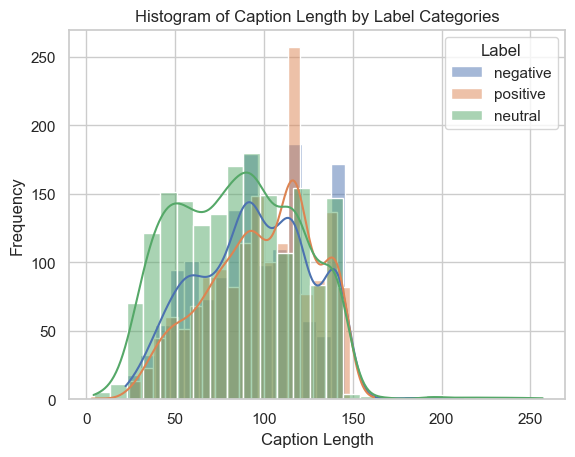

In [34]:
for label in data['LABEL'].unique():
    sns.histplot(data=data[data['LABEL'] == label], x="Caption Length", label=label, kde=True)

plt.xlabel("Caption Length")
plt.ylabel("Frequency")
plt.title("Histogram of Caption Length by Label Categories")

plt.legend(title="Label", loc="upper right")
plt.show()

## Analysis of Hashtags

In [44]:
data['Hashtags'] = data['Caption'].str.extractall(r'#(\w+)').groupby(level=0)[0].apply(', '.join)

data['Hashtags'] = data['Hashtags'].fillna('')

data['Total Hashtags'] = data['Hashtags'].str.split(', ').apply(lambda x: len(x) if x[0] != '' else 0)
data['Hashtags'].replace('', np.nan, inplace=True)
data.head()

,File Name,Caption,LABEL,Caption Length,Hashtags,Total Hashtags
0,1.txt,How I feel today #legday #jelly #aching #gym,negative,45,"legday, jelly, aching, gym",4
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative,99,disgraced,1
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive,117,NaN,0
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral,93,powerless,1
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive,42,Rattled,1


In [50]:
data['Total Hashtags'].value_counts()

Total Hashtags
0     2453
1      939
2      463
3      305
4      211
5      120
6      101
7       61
8       58
9       37
10      31
14      25
11      23
12      17
15      14
13      11
Name: count, dtype: int64

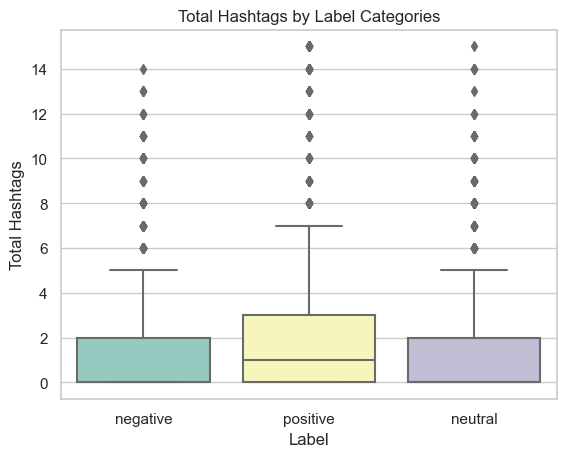

In [45]:
sns.boxplot(x="LABEL", y="Total Hashtags", data=data, palette="Set3")

plt.xlabel("Label")
plt.ylabel("Total Hashtags")
plt.title("Total Hashtags by Label Categories")

plt.show()

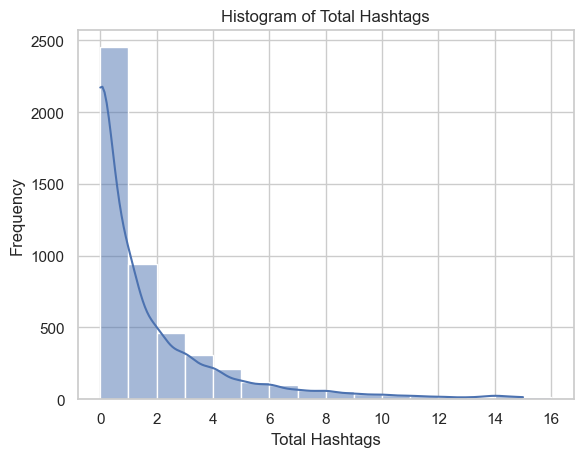

In [46]:
sns.histplot(data=data, x="Total Hashtags", bins=range(0, data['Total Hashtags'].max() + 2), kde=True)

plt.xlabel("Total Hashtags")
plt.ylabel("Frequency")
plt.title("Histogram of Total Hashtags")

plt.show()

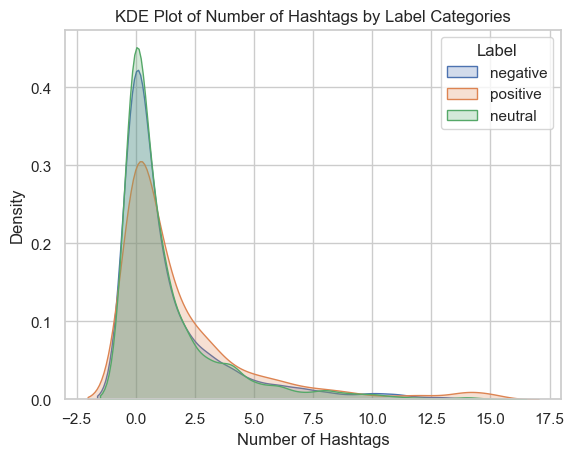

In [49]:
sns.set(style="whitegrid")

for label in data['LABEL'].unique():
    sns.kdeplot(data=data[data['LABEL'] == label], x="Total Hashtags", label=label, fill=True)

plt.xlabel("Number of Hashtags")
plt.ylabel("Density")
plt.title("KDE Plot of Number of Hashtags by Label Categories")

plt.legend(title="Label", loc="upper right")
plt.show()

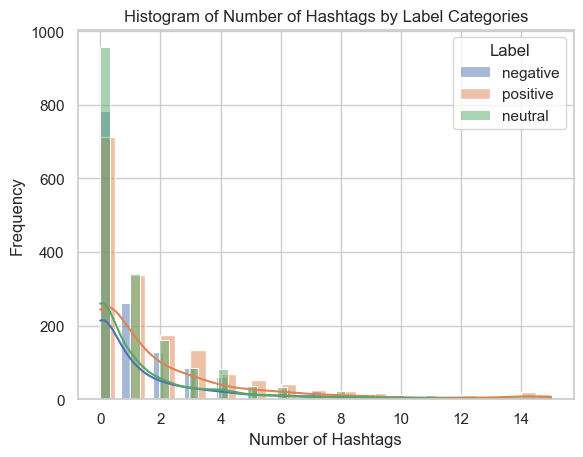

In [48]:
for label in data['LABEL'].unique():
    sns.histplot(data=data[data['LABEL'] == label], x="Total Hashtags", label=label, kde=True)

plt.xlabel("Number of Hashtags")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Hashtags by Label Categories")

plt.legend(title="Label", loc="upper right")
plt.show()

In [65]:
positive_hashtags_string = ', '.join(data[data['LABEL'] == 'positive']['Hashtags'].dropna())
negative_hashtags_string = ', '.join(data[data['LABEL'] == 'negative']['Hashtags'].dropna())
neutral_hashtags_string = ', '.join(data[data['LABEL'] == 'neutral']['Hashtags'].dropna())

positive_hashtags_list = positive_hashtags_string.split(', ')
negative_hashtags_list = negative_hashtags_string.split(', ')
neutral_hashtags_list = neutral_hashtags_string.split(', ')

print("Total number of positive hashtags: {}\nNumber of unique positive hashtags: {}\n".format(len(positive_hashtags_list), len(set(positive_hashtags_list))))
print("Total number of negative hashtags: {}\nNumber of unique negative hashtags: {}\n".format(len(negative_hashtags_list), len(set(negative_hashtags_list))))
print("Total number of neutral hashtags: {}\nNumber of unique neutral hashtags: {}\n".format(len(neutral_hashtags_list), len(set(neutral_hashtags_list))))

Total number of positive hashtags: 3183
Number of unique positive hashtags: 1939

Total number of negative hashtags: 2012
Number of unique negative hashtags: 1428

Total number of neutral hashtags: 2329
Number of unique neutral hashtags: 1688



In [66]:
unique_positive_hashtags = set(positive_hashtags_list)
unique_negative_hashtags = set(negative_hashtags_list)
unique_neutral_hashtags = set(neutral_hashtags_string)

In [72]:
hashtags_overlap = unique_positive_hashtags.intersection(unique_negative_hashtags, unique_neutral_hashtags)
print(list(hashtags_overlap))

['d', '1', '2', 'f']


<font size='5'>
There is minimal overlap in hashtags and they can most likely be effectively used to classify tweets
</font>